In [1]:
data_file='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [2]:
!wget $data_file

--2021-09-20 12:01:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.04s   

2021-09-20 12:01:06 (172 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('AB_NYC_2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
print(df.columns)
print(len(df))

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
48895


EDA


In [10]:
import seaborn as sns

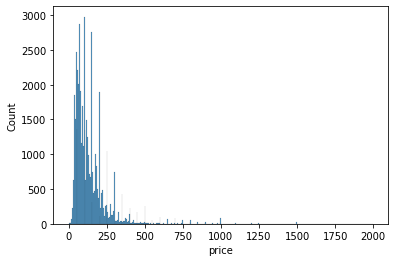

In [15]:
sns.histplot(df['price'][df['price']<2000])

In [17]:
features=['latitude',           
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']
features

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [19]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [20]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Question 1

In [23]:
df[features]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [24]:
df[features].isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Question 2

In [29]:
df.minimum_nights.median()

3.0


3.0

Spliting the data

In [41]:
np.random.seed(42)
num_total=len(df)
#shuffling the dataset
idx=np.arange(num_total)
print(idx)
np.random.shuffle(idx)
print(idx)
df_shuffled=df[features].iloc[idx]

print(df_shuffled.columns)

# Finding number of samples in train, test and validation
num_test=int(0.2*num_total)
num_val=int(0.2*num_total)
num_train=num_total-num_test-num_val

#creating the train,test,validation dataset
df_train=df_shuffled.iloc[:num_train].copy()
df_val=df_shuffled.iloc[num_train:num_train+num_val].copy()
df_test=df_shuffled.iloc[num_train+num_val:].copy()
print(len(df_train))
print(len(df_test))
print(len(df_val))

[    0     1     2 ... 48892 48893 48894]
[  879 44383 15394 ... 38158   860 15795]
Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
29337
9779
9779


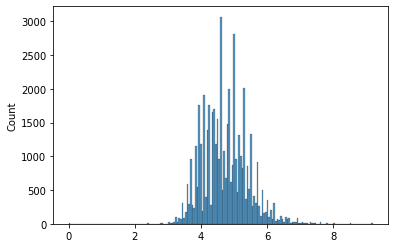

In [63]:
#preparing the target values for the train, test and validation
y_train_original=df_train.price.values
y_val_original=df_val.price.values
y_test_original=df_test.price.values

y_train=np.log1p(y_train_original)
y_test=np.log1p(y_test_original)
y_val=np.log1p(y_val_original)

y_all_original=df_shuffled.price.values
y_all_logged=np.log1p(y_all_original)
sns.histplot(y_all_logged)

Question 3

In [64]:
df_train.isnull().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [65]:
def prepare_data(df,value_to_fill):
  df=df.fillna(value_to_fill)
  X=df.values
  return X

In [66]:
X_train=prepare_data(df_train,0)
X_train.shape
ones_vector = np.ones(X_train.shape[0])
ones_vector.shape

(29337,)

In [67]:
def linear_regression(X_train,y_train):
  ones_vector = np.ones(X_train.shape[0])
  X_train=np.column_stack([ones_vector,X_train])
  XTX=X_train.T.dot(X_train)
  XTX_inv=np.linalg.inv(XTX)
  W=XTX_inv.dot(X_train.T).dot(y_train)

  return W

In [68]:
def rmse(y,y_pred):
  se=(y-y_pred)**2
  mse=se.mean()
  return np.sqrt(mse)

In [76]:
# Training with fill of 0
X_train=prepare_data(df_train,0)
W=linear_regression(X_train,y_train)
y_pred=W[0]+X_train.dot(W[1:])
rmse_train=rmse(y_train,y_pred)

# on validation data
X_val=prepare_data(df_val,0)
#print(X_val.shape)
y_pred=W[0]+X_val.dot(W[1:])
#print(y_pred.shape)
rmse_val_0=rmse(y_val,y_pred)



In [77]:
df_train.isnull().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [78]:
# Training with fill of mean
# Finding the mean of reviews_per_month
mean_rpm=df_train['reviews_per_month'].mean()
print(mean_rpm)

X_train=prepare_data(df_train,mean_rpm)
W=linear_regression(X_train,y_train)
y_pred=W[0]+X_train.dot(W[1:])
rmse_train=rmse(y_train,y_pred)

# on validation data
X_val=prepare_data(df_val,mean_rpm)
#print(X_val.shape)
y_pred=W[0]+X_val.dot(W[1:])
#print(y_pred.shape)
rmse_val_mean=rmse(y_val,y_pred)


1.3685492094777056


In [80]:
#comparing the rmse of zero fill and mean fill
print(round(rmse_val_0,2))
print(round(rmse_val_mean,2))

0.51
0.51


Question 4

In [85]:
def linear_regression_reg(X_train,y_train,r):
  ones_vector = np.ones(X_train.shape[0])
  X_train=np.column_stack([ones_vector,X_train])
  XTX=X_train.T.dot(X_train)
  reg=r*np.eye(XTX.shape[0])
  XTX=XTX+reg
  XTX_inv=np.linalg.inv(XTX)
  W=XTX_inv.dot(X_train.T).dot(y_train)

  return W

In [87]:
#
X_train=prepare_data(df_train,0)
r=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for val in r:
  W=linear_regression_reg(X_train,y_train,val)
  y_pred=W[0]+X_train.dot(W[1:])
  #rmse_train=rmse(y_train,y_pred)

  # on validation data
  X_val=prepare_data(df_val,0)
  y_pred=W[0]+X_val.dot(W[1:])
  rmse_val=rmse(y_val,y_pred)
  print(val,round(rmse_val,2))


0 0.51
1e-06 0.51
0.0001 0.51
0.001 0.51
0.01 0.52
0.1 0.53
1 0.53
5 0.53
10 0.53


Question 5

In [95]:
def prepare_df(df,features,seed_value):
  np.random.seed(seed_value)
  num_total=len(df)
  #shuffling the dataset
  idx=np.arange(num_total)
  #print(idx)
  np.random.shuffle(idx)
  #print(idx)
  df_shuffled=df[features].iloc[idx]

  #print(df_shuffled.columns)

  # Finding number of samples in train, test and validation
  num_test=int(0.2*num_total)
  num_val=int(0.2*num_total)
  num_train=num_total-num_test-num_val

  #creating the train,test,validation dataset
  df_train=df_shuffled.iloc[:num_train].copy()
  df_val=df_shuffled.iloc[num_train:num_train+num_val].copy()
  df_test=df_shuffled.iloc[num_train+num_val:].copy()

  #preparing the target values for the train, test and validation
  y_train_original=df_train.price.values
  y_val_original=df_val.price.values
  y_test_original=df_test.price.values

  y_train=np.log1p(y_train_original)
  y_test=np.log1p(y_test_original)
  y_val=np.log1p(y_val_original)

  X_train=prepare_data(df_train,0)
  X_val=prepare_data(df_val,0)
  X_test=prepare_data(df_test,0)
  
  return X_train,X_val,X_test,y_train,y_val,y_test


In [99]:
seed=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_val=[]
for val in seed:
  X_train,X_val,X_test,y_train,y_val,y_test=prepare_df(df,features,val)
  W=linear_regression(X_train,y_train)
  y_pred=W[0]+X_train.dot(W[1:])
  #rmse_train=rmse(y_train,y_pred)

  y_pred=W[0]+X_val.dot(W[1:])
  rmse_val.append(rmse(y_val,y_pred))

print(rmse_val)
rmse_std=round(np.std(rmse_val),3)
print(rmse_std)

[0.5075591015939082, 0.55281363971486, 0.5100524498979423, 0.5347040972659989, 0.4895942225839773, 0.4871749166120852, 0.48439172273078673, 0.47653059434753187, 0.5357212602999242, 0.49457407250161645]
0.024


Question 6

In [104]:
seed_val=9
X_train,X_val,X_test,y_train,y_val,y_test=prepare_df(df,features,seed_val)
X_train_full=np.concatenate([X_train,X_val])
print(X_train_full.shape)
y_train_full=np.concatenate([y_train,y_val])
print(y_train_full.shape)

(39116, 8)
(39116,)


In [105]:
29337+9779

39116

In [106]:
W=linear_regression_reg(X_train_full,y_train_full,0.001)
y_pred=W[0]+X_train_full.dot(W[1:])
rmse_train=rmse(y_train_full,y_pred)
print(rmse_train)
y_pred=W[0]+X_test.dot(W[1:])
rmse_test=rmse(y_test,y_pred)
print(rmse_test)


0.5000854723488242
0.5196670852074082
